# Brown'sche Bewegung

## Teil 1: Importieren und Darstellen der Daten

In [2]:
#Importieren der notwendigen Module
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))


In [55]:
#Einlesen der Daten
t,x,y = np.loadtxt('/Users/Peter/Desktop/Python-Kurs/MessungJSPM.dat' , skiprows=1, usecols=(1,2,3), 
                    converters= {1:comma_to_float, 2:comma_to_float, 3:comma_to_float},unpack=True)


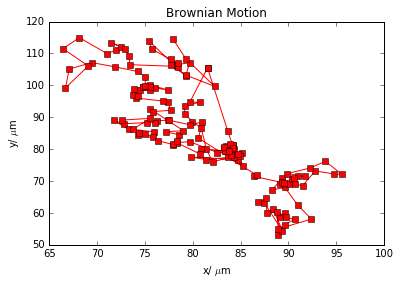

In [56]:
#Wir verschaffen uns einen Überblick über die Bewegung des Teilchens mit Hilfe eines Punkt-Linien-Diagramms
plt.plot(x,y,marker='s', color = 'red', linewidth = 1 )
plt.xlabel('x/'+' $\mu$'+'m')
plt.ylabel('y/'+' $\mu$'+'m')
plt.title('Brownian Motion')
plt.savefig('brown1.pdf', format = 'PDF')



## Teil 2: Berechnung mittleres Verschiebungsquadrat und Fehler

In [66]:

dt = np.array([]) 
dx = np.array([]) 
dy = np.array([]) 

for i in range(len(t)-1):
    dt = np.append(dt,t[i+1] - t[i])
    dx = np.append(dx,x[i+1]-x[i])
    dy = np.append(dy,y[i+1] - y[i])


r_squared=dx**2+dy**2
r_squared_mean=np.mean(r_squared)
print("r_squared_mean= " ,r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= " ,r_squared_mean_std)
dt_mean=np.mean(dt)
print("dt_mean= ", dt_mean)

# gefundene Werte, wenn alle Messdaten benutzt werden:
#r_squared_mean=  14.6056025102
#r_squared_mean_std=  3.08628207078
#dt_mean=  1.00053061224


r_squared_mean=  14.6056025102
r_squared_mean_std=  3.08628207078
dt_mean=  1.00053061224


## Teil 3: Kontrollverteilung

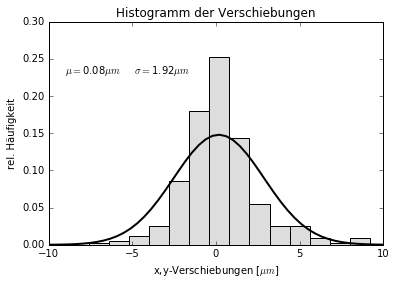

In [85]:

plt.hist(all_data, normed=1, bins=np.arange(-10, 10, 1.2),color='#DDDDDD')

mu=np.mean(all_data)
sigma=np.std(all_data) 
gauss = mlab.normpdf(np.linspace(-10,10), mu , sigma) 
plt.plot(np.linspace(-10,10), gauss, 'r-', linewidth=2,color='#000000') 
plt.title('Histogramm der Verschiebungen') 
plt.xlabel('x,y-Verschiebungen [$ \mu m$]') 
plt.ylabel('rel. Häufigkeit') 
plt.text(-9, 0.23, '$\mu=$'+str(round(np.mean(np.append(dx,dy)),2))+'$\mu m \quad$'+'  $\sigma=$'+str(round(np.std(np.append(dx,dy)),2))+'$\mu m$')
plt.savefig('brown_2.1.pdf', format='PDF')


## Teil 4: Kumulative Verteilung der Verschiebungsquadrate

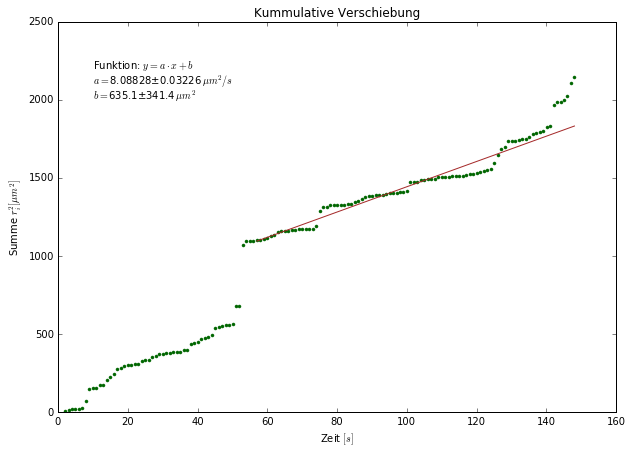

In [83]:
r_kumm=np.cumsum(r_squared)
plt.figure(figsize=(10,7))
plt.plot(t[:-1], r_kumm, marker='.', color='#006600', linewidth=0)
plt.xlabel('Zeit $[s]$')
plt.ylabel('Summe $r_i^2  [\mu m^2]$')
plt.title('Kummulative Verschiebung')

from scipy.optimize import curve_fit

def linear(x,a,b):
    return a*x+b
popt, pcov = curve_fit(linear, t[57:-8], r_kumm[57:-7])
plt.text(10,2200,"Funktion: $y=a \cdot x + b$")
plt.text(10,2100,"$a=$" + "{0:.5f}".format(popt[0]) +u"\u00B1"+ "{0:.5f}".format(pcov[0,0]) + "$\,\mu m^2 / s$")
plt.text(10,2000,"$b=$" + "{0:.1f}".format(popt[1]) +u"\u00B1"+ "{0:.1f}".format(pcov[1,1]) + "$\,\mu m^2$")
plt.plot(t[55:-1], linear(t[55:-1],*popt), color="brown")
plt.savefig('brown3.pdf', format='PDF', orientation='landscape',papertype = 'a4')
